# Aula 3 - Numpy e Pandas

Nessa aula, iremos tratar dos seguintes conteúdos:
- Numpy Matrizes
- Métodos de Matrizes Numpy
- Pandas
- Series
- Métodos Pandas
- DataFrames
- Trabalhando com CSVs

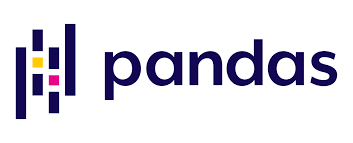

## Pandas

__Pandas__ é um pacote python construído com base no __NumPy__ e __Matplotlib__ que busca organizar dados no formato de tabela, atribuindo rótulos às linhas e colunas. O pacote __Pandas__ fornece ainda um conjunto de funcionalidades que permite processar as informações de tabelas de forma bastante eficiente, implementando métodos fundamentais para fins de tratamento de dados.

O Pandas organiza os dados nos seguintes tipos de estruturas:
- Series (Séries)
- DataFrame

 O __Pandas__ é um pacote e para utilizarmos, devemos importá-lo para o nosso notebook da seguinte forma:

In [1]:
import pandas as pd 
import numpy as np 

##   

### Series
A estrutura de representação tipo __Series__ do __Pandas__ é semelhante a um array unidimensional, porém os elementos podem ser indexados por números inteiros (como em um array do NumPy) ou por meio de rótulos (labels) que não precisam ser únicos e podem ser organizados de forma hierárquica.
- Quando os índices ou rótulos não são informados explicitamente, Pandas cria uma indexação com números inteiros automaticamente, variando os índices de $0$ (zero) a $n-1$, onde $n$ é o número de elementos na série.
- Os rótulos são usados para realizar buscas rápidas, alinhamento de dados e operações de junção de dados.

#### Criando séries com Pandas
Séries podem ser criadas no Pandas de diferentes formas, a partir de:
- Listas ou Arrays
- Dicionários
- DataFrames

### Utilizando Listas ou Arrays

In [2]:
sorteio = [
    [23, 45, 67, 89, 12, 34, 56, 78, 90, 21],
    [11, 22, 33, 44, 55, 66, 77, 88, 99, 10],
    [19, 28, 37, 46, 55, 64, 73, 82, 91, 20],
    [13, 26, 39, 52, 65, 78, 81, 94, 17, 30],
    [14, 25, 36, 47, 58, 69, 70, 81, 92, 13]
]

pd.Series(sorteio)

0    [23, 45, 67, 89, 12, 34, 56, 78, 90, 21]
1    [11, 22, 33, 44, 55, 66, 77, 88, 99, 10]
2    [19, 28, 37, 46, 55, 64, 73, 82, 91, 20]
3    [13, 26, 39, 52, 65, 78, 81, 94, 17, 30]
4    [14, 25, 36, 47, 58, 69, 70, 81, 92, 13]
dtype: object

In [3]:
array = np.random.randint(1, 100, size=20)
array

array([84, 27,  3, 36, 76, 17, 71, 14,  9, 97, 86,  4, 86, 92, 57, 91, 74,
       98,  7, 55])

Agora vamos criar uma Serie a partir de um __np.array__:

In [4]:
serie = pd.Series(array)
serie

0     84
1     27
2      3
3     36
4     76
5     17
6     71
7     14
8      9
9     97
10    86
11     4
12    86
13    92
14    57
15    91
16    74
17    98
18     7
19    55
dtype: int64

### Utilizando Dicionários

In [5]:
dicionario =  {
    "banana": 2.75,
    "uva": 7.90,
    "morango": 12.75,
    "goiaba": 6.99
}

Transformando um dicionário em uma serie pandas

In [6]:
pd.Series(dicionario)

banana      2.75
uva         7.90
morango    12.75
goiaba      6.99
dtype: float64

##   

In [7]:
# O método keys do python retorna as chaves de um dicionário.

dicionario.keys()

dict_keys(['banana', 'uva', 'morango', 'goiaba'])

In [8]:
# O pandas também tem um atributo keys

serie_dicio = pd.Series(dicionario)

serie_dicio.keys().tolist()

# serie_dicio.keys() retorna uma lista com as chaves da serie

['banana', 'uva', 'morango', 'goiaba']

In [9]:
# Consigo também os valoes
serie_dicio.values

array([ 2.75,  7.9 , 12.75,  6.99])

In [10]:
# E posso indexar
serie_dicio.values[3].tolist()

6.99

In [11]:
# Usando o Index
serie_dicio.index

Index(['banana', 'uva', 'morango', 'goiaba'], dtype='object')

### Indexação

Assim como para os arrays, conseguimos acessar diversos elementos da __Serie__ a partir dos __índices:__

In [12]:
serie_dicio.index[-1]

'goiaba'

In [13]:
serie.index[2]

2

Da mesma forma, conseguimos fazer o __Slicing__ em uma __Serie__:

In [14]:
serie[10:15]

10    86
11     4
12    86
13    92
14    57
dtype: int64

In [15]:
serie_dicio['morango']

np.float64(12.75)

##   

### Labels

Uma característica especial das __Series__ é que podemos escolher quais os __índices__ que queremos atribuir para cada um dos elementos e acessá-los a partir da __nova identifcação__ deles:

In [16]:
lista_indices = ['a','b','c','d','e','f','g']
lista_numeros = [1,2,3,4,5,6,7]

# Criando a seria já indexada

serie_indexada = pd.Series(index=lista_indices, data=lista_numeros)
serie_indexada

a    1
b    2
c    3
d    4
e    5
f    6
g    7
dtype: int64

##   

### Operações Matemáticas

De maneira análoga ao que fizemos usando os __arrays__, pode-se fazer qualquer tipo de manipulação matemática utilizando as __Series__:

In [17]:
serie_dicio

banana      2.75
uva         7.90
morango    12.75
goiaba      6.99
dtype: float64

In [18]:
# Aumentando todos os preços em 10

serie_dicio + 10

banana     12.75
uva        17.90
morango    22.75
goiaba     16.99
dtype: float64

##   

## Métodos Pandas

Justamente pela biblioteca __Pandas__ utilizando do NumPy para a construção da sua arquitetura, muito dos métodos que são nativos do NumPy também vão funcionar com o __Pandas__, além de alguns novos métodos que veremos a seguir:

In [19]:
notas = [8.23, 3.45, 7.89, 2.34, 9.01, 5.67, 4.56, 6.78, 1.23, 0.45, 8.67, 3.21, 7.65, 2.98, 9.34, 5.12, 4.89, 6.45, 1.78, 0.98, 8.12, 3.56, 7.34, 2.67, 9.78, 5.34, 4.12, 6.89, 1.45, 0.67, 8.45, 3.78, 7.12, 2.45, 9.56]

notas = pd.Series(notas)
notas.head() # exibe as primeiras 5 linhas
notas.tail() # exibe as últimas 5 linhas
notas

0     8.23
1     3.45
2     7.89
3     2.34
4     9.01
5     5.67
6     4.56
7     6.78
8     1.23
9     0.45
10    8.67
11    3.21
12    7.65
13    2.98
14    9.34
15    5.12
16    4.89
17    6.45
18    1.78
19    0.98
20    8.12
21    3.56
22    7.34
23    2.67
24    9.78
25    5.34
26    4.12
27    6.89
28    1.45
29    0.67
30    8.45
31    3.78
32    7.12
33    2.45
34    9.56
dtype: float64

In [20]:
numeros = [34, 23, 1, 87, 45, 23, 1, 98, 54, 34, 3]

numeros = pd.Series(numeros)
numeros

0     34
1     23
2      1
3     87
4     45
5     23
6      1
7     98
8     54
9     34
10     3
dtype: int64

__sort_values__: este método ordena a Serie de acordo com os valores númericos dos elementos:

In [21]:
notas.sort_values() # Ordena o valor mas mantém o indice original


9     0.45
29    0.67
19    0.98
8     1.23
28    1.45
18    1.78
3     2.34
33    2.45
23    2.67
13    2.98
11    3.21
1     3.45
21    3.56
31    3.78
26    4.12
6     4.56
16    4.89
15    5.12
25    5.34
5     5.67
17    6.45
7     6.78
27    6.89
32    7.12
22    7.34
12    7.65
2     7.89
20    8.12
0     8.23
30    8.45
10    8.67
4     9.01
14    9.34
34    9.56
24    9.78
dtype: float64

In [22]:
numeros.sort_values()

2      1
6      1
10     3
5     23
1     23
0     34
9     34
4     45
8     54
3     87
7     98
dtype: int64

__unique:__ este método retorna todos os __valores distintos__ dentro de uma __Serie__:

In [23]:
notas.unique().shape

(35,)

In [24]:
numeros.unique() # tras apenas os elementos únicos

array([34, 23,  1, 87, 45, 98, 54,  3])

In [25]:
numeros.shape # 35
numeros.unique().shape # 8
numeros.unique()

array([34, 23,  1, 87, 45, 98, 54,  3])

__nunique:__ este método retorna a quantidade de __valores distintos__ dentro de uma __Serie__:

In [26]:
# Não preciso usar o .shape após o .unique() para saber a quantidade de dados únicos
numeros.nunique()

8

__value_counts:__ este método retorna as __frequências (contagens)__ para cada um dos __elementos distintos__ dentro de uma Serie:

In [27]:
# Muito utilizado
# quanto de cada valor único
numeros.value_counts()

34    2
23    2
1     2
87    1
45    1
98    1
54    1
3     1
Name: count, dtype: int64

Podemos também ao invés de retorna as frequências, retornar as __proporções__ de cada um dos __elementos distintos__:

In [28]:
numeros.value_counts(normalize=True)

34    0.181818
23    0.181818
1     0.181818
87    0.090909
45    0.090909
98    0.090909
54    0.090909
3     0.090909
Name: proportion, dtype: float64

In [29]:
# Particionando (histograma)
numeros.value_counts(normalize=True, bins=5)

(20.4, 39.8]     0.363636
(0.902, 20.4]    0.272727
(39.8, 59.2]     0.181818
(78.6, 98.0]     0.181818
(59.2, 78.6]     0.000000
Name: proportion, dtype: float64

In [30]:
# Melhorando o resultado
numeros.value_counts(normalize=True, bins=5).mul(100).round(2)

(20.4, 39.8]     36.36
(0.902, 20.4]    27.27
(39.8, 59.2]     18.18
(78.6, 98.0]     18.18
(59.2, 78.6]      0.00
Name: proportion, dtype: float64

In [31]:
numeros.value_counts(normalize=True, bins=5).mul(100).round(2).astype(str) + ' %'

(20.4, 39.8]     36.36 %
(0.902, 20.4]    27.27 %
(39.8, 59.2]     18.18 %
(78.6, 98.0]     18.18 %
(59.2, 78.6]       0.0 %
Name: proportion, dtype: object

A seguir teremos alguns outros métodos já conhecidos do __NumPy__ que retorna algumas estatísticas básicas para a Serie:

In [32]:
numeros.sum()

np.int64(403)

In [33]:
numeros.mean()

np.float64(36.63636363636363)

In [34]:
numeros.min()

np.int64(1)

In [35]:
numeros.max()

np.int64(98)

In [36]:
numeros.std()

np.float64(32.75751128297975)

In [37]:
numeros.median()

np.float64(34.0)

In [38]:
numeros.mode()

0     1
1    23
2    34
dtype: int64

In [39]:
numeros.quantile(0.25)

np.float64(13.0)

In [40]:
numeros.quantile(0.75)

np.float64(49.5)

In [41]:
numeros.quantile(0.1)

np.float64(1.0)

In [42]:
numeros.quantile([0.25, 0.5, 0.75])

0.25    13.0
0.50    34.0
0.75    49.5
dtype: float64

__describe:__ este é um método muito útil que vai trazer um resumos das __principais estátisticas__ da Serie que estamops trabalhando:

In [43]:
numeros.describe().round(2)

count    11.00
mean     36.64
std      32.76
min       1.00
25%      13.00
50%      34.00
75%      49.50
max      98.00
dtype: float64

##   

In [44]:
numeros.describe(percentiles=np.arange(0, 0.9, 0.1)).round(2)

count    11.00
mean     36.64
std      32.76
min       1.00
0%        1.00
10%       1.00
20%       3.00
30%      23.00
40%      23.00
50%      34.00
60%      34.00
70%      45.00
80%      54.00
max      98.00
dtype: float64

## Exercícios

**1)** Cria uma série de pandas que tenha os números inteiros de 0 a 100.

In [45]:
import pandas as pd
import numpy as np 

serie = pd.Series(np.arange(0, 101))
print(serie)

0        0
1        1
2        2
3        3
4        4
      ... 
96      96
97      97
98      98
99      99
100    100
Length: 101, dtype: int64


**2)** Considere uma série de notas de alunos:
 
 notas = pd.Series([10, 8, 6.5, 9, 7.5, 8.5, 9, 9, 4, 8.5, 7.5,
                   8, 10, 10, 4.5, 4.5, 9, 8, 8, 9, 9, 9, 6.5,
                   5, 6, 4.5, 9, 10, 1, 0,5, 7, 9, 6.5, 5, 8])
                   
Determine:

**a)** A nota média

**b)** O desvio padrão

**c)** A moda

**d)** A mediana

In [46]:
notas = pd.Series([10, 8, 6.5, 9, 7.5, 8.5, 9, 9, 4, 8.5, 7.5, 8, 10, 10, 4.5, 4.5, 9, 8, 8, 9, 9, 9, 6.5, 5, 6, 4.5, 9, 10, 1, 0,5, 7, 9, 6.5, 5, 8])

resumo = notas.describe()
media = notas.mean()
desvio = notas.std()
moda = notas.mode()
mediana = notas.median()
# print(media[])
mediana

np.float64(8.0)

## DataFrame

__DataFrames__ assim como na mesma analogia para as matrizes, são um __conjunto de Series__ que vão ser bem caracterizados pelo o seu formato tabular (o que facilita muito o processo de manipulação dos dados!):

In [126]:
import pandas as pd
# Cria um dicionario com nomes de alunos e suas respectivas notas
dictionary = {'Alunos': ['Sandro', 'Rafael', 'Tiago', 'André', 'Camila', 'Teo', 'Carlos', 'Juca', 'Carla'],
              'Notas': [8, 10, 9.5, 7.5, 9.5, 10, 5, 6.5, 10]}

# Cria um DataFrame a partir de um dicionario
df = pd.DataFrame(dictionary)

# Mostra o resultado do DataFrame
df

,Alunos,Notas
0,Sandro,8.0
1,Rafael,10.0
2,Tiago,9.5
3,André,7.5
4,Camila,9.5
5,Teo,10.0
6,Carlos,5.0
7,Juca,6.5
8,Carla,10.0


Todo o processo que vimos sobre __indexação__ e __métodos__  para as Series são válidas também quando trabalhamos com __DataFrames:__

In [48]:
df.index

RangeIndex(start=0, stop=9, step=1)

In [49]:
df["Alunos"]

0    Sandro
1    Rafael
2     Tiago
3     André
4    Camila
5       Teo
6    Carlos
7      Juca
8     Carla
Name: Alunos, dtype: object

In [50]:
# Filtragem, ver apenas notas da Camila

df[df['Alunos']=='Camila']

,Alunos,Notas
4,Camila,9.5


In [51]:
# alunos com notas entre 6 e 8

df[(df['Notas'] >= 6) & (df['Notas'] <= 8)]

,Alunos,Notas
0,Sandro,8.0
3,André,7.5
7,Juca,6.5


In [52]:
# Exibindo os alunos com as maiores notas. 
df[ df['Notas'] == df['Notas'].max()]

,Alunos,Notas
1,Rafael,10.0
5,Teo,10.0
8,Carla,10.0


In [53]:
#

lista_notas = [8., 10.,5.]

df[df['Notas'].isin(lista_notas)]

df[~df['Notas'].isin(lista_notas)]

,Alunos,Notas
2,Tiago,9.5
3,André,7.5
4,Camila,9.5
7,Juca,6.5


In [54]:
# Pegar apenas nomes iniciado em A
df[df['Alunos'].str.startswith('A')]

,Alunos,Notas
3,André,7.5


In [55]:
# lower
df['Alunos'].str.lower()

0    sandro
1    rafael
2     tiago
3     andré
4    camila
5       teo
6    carlos
7      juca
8     carla
Name: Alunos, dtype: object

In [56]:
df[df['Alunos'].str.lower().str.startswith('a')]

,Alunos,Notas
3,André,7.5


In [57]:
# Quais alunos tiraram 7 (Gambiarra - não fazer em produção#)

df[df['Notas'].astype(str).str.startswith('7')]

# df[ ] : O dataframe
# df['Notas']: A coluna que será analisada
# .astype(str): convertendo o tipo para string
# .str: métodos de string
# . startswith(): método que busca o primeiro caractere
# '7' O caractere buscado.


,Alunos,Notas
3,André,7.5


In [58]:
# Negando com (~) retorna o contrário 
df[~df['Notas'].astype(str).str.startswith('7')]

,Alunos,Notas
0,Sandro,8.0
1,Rafael,10.0
2,Tiago,9.5
4,Camila,9.5
5,Teo,10.0
6,Carlos,5.0
7,Juca,6.5
8,Carla,10.0


In [59]:
# Escolhendo um intervalo
# Isso é uma consulta, não altera o dataframe original
df[(df['Notas'] >= 7) & (df['Notas'] <= 9)] 

,Alunos,Notas
0,Sandro,8.0
3,André,7.5


#### Fazendo query com pandas

In [60]:
# Rápido porém restrito a consultas. 

df.query('Notas >= 7 and Notas < 8')

,Alunos,Notas
3,André,7.5


#### PandasSql

In [61]:
# Utilizando sql no pandas

import pandasql as ps 

ps.sqldf("""
         SELECT Alunos, Notas
         FROM df
         WHERE Notas >= 7 AND Notas < 8
         """)

,Alunos,Notas
0,André,7.5


In [62]:
# Melhorando o dataframe
df

,Alunos,Notas
0,Sandro,8.0
1,Rafael,10.0
2,Tiago,9.5
3,André,7.5
4,Camila,9.5
5,Teo,10.0
6,Carlos,5.0
7,Juca,6.5
8,Carla,10.0


#### Curiosidade

A biblioteca random não gera números aleatórios de verdade

### Adicionando uma nova Coluna ao Dataframe

In [63]:
# Gerando coluna faltas com (for) normal
from random import randint
faltas = []
for i in range(0, 10):
    faltas.append(randint(0, 10))
    
faltas

[8, 5, 9, 7, 6, 1, 1, 0, 1, 2]

In [64]:
# Gerando faltas com list comprehension
faltas = [randint(0, 10) for _ in range(df.shape[0])]
faltas

[1, 6, 6, 7, 2, 4, 0, 4, 2]

In [65]:
# Gerando faltas com numpy
import numpy as np 

# Gerando faltas com for normal
lista_faltas = np.random.randint(0, 7, size=9)
lista_faltas


array([2, 2, 4, 2, 1, 2, 6, 6, 4])

In [66]:
# acrescentando a nova coluna de faltas no dataframe

df['Faltas'] = lista_faltas
df

,Alunos,Notas,Faltas
0,Sandro,8.0,2
1,Rafael,10.0,2
2,Tiago,9.5,4
3,André,7.5,2
4,Camila,9.5,1
5,Teo,10.0,2
6,Carlos,5.0,6
7,Juca,6.5,6
8,Carla,10.0,4


In [67]:
# mostrar apenas colunas específicas

df[['Alunos', 'Faltas']]

,Alunos,Faltas
0,Sandro,2
1,Rafael,2
2,Tiago,4
3,André,2
4,Camila,1
5,Teo,2
6,Carlos,6
7,Juca,6
8,Carla,4


In [68]:
# Filtrar faltas mas mostrar alunos e notas
df[df['Faltas'] >= 5][['Alunos', 'Notas']]

,Alunos,Notas
6,Carlos,5.0
7,Juca,6.5


In [69]:
#df[df['Faltas'] == 0][['Alunos']]

In [70]:
df[df['Faltas'] == 1]

,Alunos,Notas,Faltas
4,Camila,9.5,1


### Utilizando .apply para utilizar funções com pandas

In [71]:
# Classificar os alunos em "Falta muito" ou "Falta Pouco"
# Definir uma função que faz essa classificação

def verifica_faltas(value):
    if value >= 5:
        return 'Falta Muito'
    else:
        return 'Falta Pouco'

In [72]:
verifica_faltas(5)

'Falta Muito'

In [73]:
# Como argumento do .apply passamos o nome da nossa função sem parênteses

df['Faltas'].apply(verifica_faltas)

0    Falta Pouco
1    Falta Pouco
2    Falta Pouco
3    Falta Pouco
4    Falta Pouco
5    Falta Pouco
6    Falta Muito
7    Falta Muito
8    Falta Pouco
Name: Faltas, dtype: object

In [74]:
# Inserindo a nova coluna no dataframe
df['Classificação Faltas'] = df['Faltas'].apply(verifica_faltas)
df

,Alunos,Notas,Faltas,Classificação Faltas
0,Sandro,8.0,2,Falta Pouco
1,Rafael,10.0,2,Falta Pouco
2,Tiago,9.5,4,Falta Pouco
3,André,7.5,2,Falta Pouco
4,Camila,9.5,1,Falta Pouco
5,Teo,10.0,2,Falta Pouco
6,Carlos,5.0,6,Falta Muito
7,Juca,6.5,6,Falta Muito
8,Carla,10.0,4,Falta Pouco


In [75]:
df['Classificação Faltas'].value_counts()

Classificação Faltas
Falta Pouco    7
Falta Muito    2
Name: count, dtype: int64

In [76]:
# Usando o numpy where para gerar comparação, mto pareceido com ternário

faltas = np.where(df['Faltas'] >= 5, 'Falta Muito', 'Falta Pouco')
faltas

array(['Falta Pouco', 'Falta Pouco', 'Falta Pouco', 'Falta Pouco',
       'Falta Pouco', 'Falta Pouco', 'Falta Muito', 'Falta Muito',
       'Falta Pouco'], dtype='<U11')

In [125]:
df['Faltas'] = faltas
df

ValueError: Length of values (9) does not match length of index (891)

In [78]:
# Saber a média de quem falta muito

df[df['Faltas'] != 'Falta Muito']['Notas'].mean()

np.float64(9.214285714285714)

#### Groupby

In [88]:
df.groupby('Classificação Faltas')['Notas'].mean()

Classificação Faltas
Falta Muito    5.750000
Falta Pouco    9.214286
Name: Notas, dtype: float64

In [89]:
df.groupby('Classificação Faltas')['Notas'].mean().reset_index().rename(columns={'Notas':'Média das notas'})

,Classificação Faltas,Média das notas
0,Falta Muito,5.750000
1,Falta Pouco,9.214286


In [90]:
df.groupby('Classificação Faltas').size()

Classificação Faltas
Falta Muito    2
Falta Pouco    7
dtype: int64

In [95]:
df.groupby('Classificação Faltas')['Notas'].std()

Classificação Faltas
Falta Muito    1.060660
Falta Pouco    1.035098
Name: Notas, dtype: float64

In [96]:
df.groupby('Classificação Faltas')['Notas'].sum()

Classificação Faltas
Falta Muito    11.5
Falta Pouco    64.5
Name: Notas, dtype: float64

In [98]:
# nlargest

df.groupby('Classificação Faltas')['Notas'].nlargest(3)

Classificação Faltas   
Falta Muito           7     6.5
                      6     5.0
Falta Pouco           1    10.0
                      5    10.0
                      8    10.0
Name: Notas, dtype: float64

In [100]:
# Ver as maiores notas
df['Notas'].nlargest(4)

1    10.0
5    10.0
8    10.0
2     9.5
Name: Notas, dtype: float64

__Método loc:__ Este é um método especial para quando queremos acessar os elementos de um DataFrame, onde podemos acessar utilizando apenas os índices ou mesmo passando duas posições específicas:

In [81]:
#TODO: REforçar método loc

## Máscaras Booleanas

Podemos fazer filtros no __DataFrame__ definindo como que para os arrays, as __máscaras booleanas:__

## Exercícios

### Para o Dataframe de Alunos utilizado

**1)** Encontre a nota média dos alunos

In [129]:
df['Notas'].mean()

np.float64(8.444444444444445)

**2)** A nota do Juca

In [130]:
df['Notas'][7]

np.float64(6.5)

In [133]:
df[ df['Alunos'] == 'Juca']

,Alunos,Notas
7,Juca,6.5


In [136]:
df[ df['Alunos'] == 'Juca']['Notas'].iloc[0]

np.float64(6.5)

In [139]:
df.query("Alunos == 'Juca'")

,Alunos,Notas
7,Juca,6.5


**3)** Os alunos com nota menor que 6.5

In [84]:
mascara = df['Notas'] < 6.5
df['Alunos'][mascara]

6    Carlos
Name: Alunos, dtype: object

**4)** Peça a descrição das notas para ter insights interessantes

In [85]:
df['Notas'].describe()

count     9.000000
mean      8.444444
std       1.810463
min       5.000000
25%       7.500000
50%       9.500000
75%      10.000000
max      10.000000
Name: Notas, dtype: float64

**5)** A moda das notas acima de 7

In [86]:

moda_maior_7 = df[df['Notas'] > 7]['Notas'].mode().iloc[0].astype(int)
print(f'A moda dos alunos com nota maior que 7 é: {moda_maior_7}')


A moda dos alunos com nota maior que 7 é: 10


##   

##   

## Trabalhando com CSVs

O __Pandas__ tem algumas funcionalidades bem interessantes, como por exemplo permitir que carregue para o Notebook arquivos no formato csv, excel, xlsx e etc. Vamos ver uma aplicação como o CSV:

In [140]:
# Carrega um arquivo CSV
df = pd.read_csv('../aula_4/data/titanic.csv')
## .. -> Sobe de pasta
## /<nome_da_pasta> entra na pasta

# Print do DataFrame
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


[Neste Link](https://www.kaggle.com/c/titanic/data), conseguimos mais informações sobre a base de dados do Titanic! O Kaggle é uma plataforma muito conheciida no quesito de competições de Data Science e Machine Learning, além de disponibilizar diversos conjuntos de dados para treinarmos =)

Vamos testar alguns outros __métodos__ disponíveis para os DaataFrames:

In [141]:
linhas, colunas = df.shape
print(f'O dataset tem {linhas} linhas e {colunas} colunas')

O dataset tem 891 linhas e 12 colunas


__Método head/tail:__ São métodos muito importantes que mostram na tela as primeiras e últimas linhas respectivamente de um __DataFrame__:

In [201]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [203]:
df.head(60) # Número máximo de linhas que consigo visualizar com o head sem fatiar, também com o tail

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [202]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [210]:
# Sobreviventes e mortos
# Utilizando o value_counts() e o .tolist() para retornar um array com a contagem e atribuindo a duas variáveis 
sobreviventes, mortos = df['Survived'].value_counts().tolist()
print(f'{sobreviventes} pessoas sobreviveram a tragédia e {mortos} morreram')

549 pessoas sobreviveram a tragédia e 342 morreram


In [222]:
# Vendo em percentuais

p_sobreviventes, p_mortos = df['Survived'].value_counts(normalize=True).mul(100).round(2).tolist()

print(f'{p_sobreviventes} % dos passageiros sobreviveram a tragédia e {p_mortos} morreram.')

61.62 % dos passageiros sobreviveram a tragédia e 38.38 morreram.


In [225]:
# Saber se há valores nulos na coluna
df['Survived'].value_counts(dropna = False)

Survived
0    549
1    342
Name: count, dtype: int64

In [228]:
# Saber se há dados faltantes

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [229]:
df['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
28.00    25
30.00    25
         ..
24.50     1
0.67      1
0.42      1
34.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [230]:
# Dados faltantes
df['Age'].value_counts(dropna = False)

Age
NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
24.50      1
0.67       1
0.42       1
34.50      1
74.00      1
Name: count, Length: 89, dtype: int64

In [235]:
df['Age'].value_counts(dropna = False, normalize=True).mul(100)

Age
NaN      19.865320
24.00     3.367003
22.00     3.030303
18.00     2.918070
28.00     2.805836
           ...    
24.50     0.112233
0.67      0.112233
0.42      0.112233
34.50     0.112233
74.00     0.112233
Name: proportion, Length: 89, dtype: float64

In [ ]:
df['Age'].value_counts(dropna = False, normalize=True)

##    

## Exercícios

### Para o Dataframe do Titanic

In [199]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**1)** Faça a leitura do Dataframe e mostre as 5 primeiras linhas

In [236]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**2)** Calcule a tarifa média por Sexo

In [245]:
df['Sex'].value_counts()

media_tarifa_homens = df[df['Sex'] == 'male']['Fare'].mean().round(2)
media_tarifa_mulheres = df[df['Sex'] == 'female']['Fare'].mean().round(2)

print(f'Media das tarifa Homens: {media_tarifa_homens}\nMedia da tarifa das Mulheres: {media_tarifa_mulheres}')

Media das tarifa Homens: 25.52
Media da tarifa das Mulheres: 44.48


In [251]:
female, male = df.groupby('Sex')['Fare'].mean().round(2)
print(f'Media das tarifa Homens: {male}\nMedia da tarifa das Mulheres: {female}')

Media das tarifa Homens: 25.52
Media da tarifa das Mulheres: 44.48


In [142]:
# Verificar quantos passageiros

df['PassengerId'].nunique()

891

**3)** Determine o passageiro que pagou a maior tarifa

In [144]:
#TODO: Entender melhor essa sintaxe
#TODO: Fazer print bonitinho
#maior = df['Fare'].max()
#df[df['Faltas'] >= 5][['Alunos', 'Notas']]
df[ df['Fare'] == df['Fare'].max()][['Name', 'Fare', 'Age']]
#maior

,Name,Fare,Age
258,"Ward, Miss. Anna",512.3292,35.0
679,"Cardeza, Mr. Thomas Drake Martinez",512.3292,36.0
737,"Lesurer, Mr. Gustave J",512.3292,35.0


In [148]:
# Mudando o tipo da coluna age de float para int
age_int = df[ df['Fare'] == df['Fare'].max()][['Name', 'Fare', 'Age']]
age_int['Age'] = age_int['Age'].astype(int)
age_int


,Name,Fare,Age
258,"Ward, Miss. Anna",512.3292,35
679,"Cardeza, Mr. Thomas Drake Martinez",512.3292,36
737,"Lesurer, Mr. Gustave J",512.3292,35


In [118]:
df['Fare'].nlargest(3).reset_index()

,index,Fare
0,258,512.3292
1,679,512.3292
2,737,512.3292


**4)** Determine a idade média dos sobreviventes

In [273]:
idade_media_sobreviventes = df.groupby('Survived')['Age'].mean()[1].round(2)
print(f'A idade média dos sobreviventes é de: {idade_media_sobreviventes} anos')

A idade média dos sobreviventes é de: 28.34 anos


__5)__ Determinem a classe com mais sobreviventes proporcionalmente

In [156]:
df['Pclass'].value_counts()

Pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64

In [155]:
df.groupby(['Pclass', 'Survived']).size().reset_index()

,Pclass,Survived,0
0,1,0,80
1,1,1,136
2,2,0,97
3,2,1,87
4,3,0,372
5,3,1,119


In [157]:
df[['Pclass', 'Survived']].value_counts()

Pclass  Survived
3       0           372
1       1           136
3       1           119
2       0            97
        1            87
1       0            80
Name: count, dtype: int64

In [161]:
df[['Pclass', 'Survived']].value_counts(sort=False).reset_index()

,Pclass,Survived,count
0,1,0,80
1,1,1,136
2,2,0,97
3,2,1,87
4,3,0,372
5,3,1,119


In [174]:
# Desafio de casa

# Calcule a proporção (%) de mortos/vivos por cada classe

#5)__ Determinem a classe com mais sobreviventes proporcionalmente

df[df['Survived'] == 1][['Pclass']].value_counts(sort=False)


Pclass
1         136
2          87
3         119
Name: count, dtype: int64

In [193]:
# Determinar o número de passageiros por classe

total_primeira_classe = df['Pclass'].value_counts().loc[1]
total_segunda_classe = df['Pclass'].value_counts().loc[2]
total_terceira_classe = df['Pclass'].value_counts().loc[3]
total_segunda_classe

np.int64(184)

In [202]:
# Determinar o número de sobreviventes por classe
df['Survived'].value_counts()


Survived
0    549
1    342
Name: count, dtype: int64

In [247]:
numero_mortos, numero_sobreviventes = df['Survived'].value_counts()

In [243]:
sobreviventes_primeira = df[ df['Survived'] == 1]['Pclass'].value_counts().reset_index().loc[0].tolist()[1]
sobreviventes_segunda = df[ df['Survived'] == 1]['Pclass'].value_counts().reset_index().loc[1].tolist()[1]
sobreviventes_terceira = df[ df['Survived'] == 1]['Pclass'].value_counts().reset_index().loc[2].tolist()[1]

In [264]:
#5)Determinem a classe com mais sobreviventes proporcionalmente

# Numero total de passageiros
total_passageiros = df['PassengerId'].nunique() # 891

# Número de passageiros por classe
total_primeira_classe # 216
total_segunda_classe # 184
total_terceira_classe # 491

# Sobrevivente por classe
sobreviventes_primeira # 136
sobreviventes_segunda # 119
sobreviventes_terceira # 87

# Calcular a proporção

proporcao_sobreviventes_primeira = (sobreviventes_primeira / total_primeira_classe) * 100
proporcao_sobreviventes_segunda = (sobreviventes_segunda / total_segunda_classe) * 100
proporcao_sobreviventes_terceira = (sobreviventes_terceira / total_terceira_classe) * 100
proporcao_sobreviventes_terceira

print(f'''
PROPORÇÃO DE SOBREVIVENTES POR CLASSE
PRIMEIRA CLASSE: {proporcao_sobreviventes_primeira:.2f} %,
SEGUNDA CLASSE: {proporcao_sobreviventes_segunda:.2f} %, 
TERCEIRA CLASSE {proporcao_sobreviventes_terceira:.2f} %.
''')


PROPORÇÃO DE SOBREVIVENTES POR CLASSE
PRIMEIRA CLASSE: 62.96 %,
SEGUNDA CLASSE: 64.67 %, 
TERCEIRA CLASSE 17.72 %.



In [265]:
df.groupby('Pclass')['Survived'].mean() * 100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

In [267]:
df['Survived']

Survived
0    549
1    342
Name: count, dtype: int64

## Desafio

1 - Escolha um dataset do [Kaggle](https://www.kaggle.com/), explore seus dados e traga uma informação interessante que você encontrou. Esta prática é bastante importante para familizariação com a exploração de dataframes

## Links, Artigos e Referências:

- [Documentação do Pandas](https://pandas.pydata.org/docs/), documentação onde vocês podem encontrar mais informações sobre os métodos e funções do Pandas e descobrir novos métodos que não foram apresentados no curso;
- ["10 Python Pandas Tricks that make your work more efficient",](https://towardsdatascience.com/10-python-pandas-tricks-that-make-your-work-more-efficient-2e8e483808ba) artigo escrito pelo Towards Data Science;
- ["28 useful Pandas functions you might not know"](https://paulovasconcellos.com.br/28-useful-pandas-functions-you-might-not-know-de42c59db085https://medium.com/@zachary.bedell/writing-beautiful-code-with-numpy-505f3b353174), artigo escrito por Paulo Vasconcellos para o Data Hackers;